In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow
import keras
import warnings
warnings.filterwarnings('ignore')

# load the data

In [4]:
fashion_mnist=keras.datasets.fashion_mnist
(train_images,train_labels),(test_images,test_labels)=fashion_mnist.load_data()

4422102/4422102 [==============================] - 0s 0us/step


In [6]:
train_images.shape

(60000, 28, 28)

In [8]:
test_images.shape

(10000, 28, 28)

# view training images

image label : 9


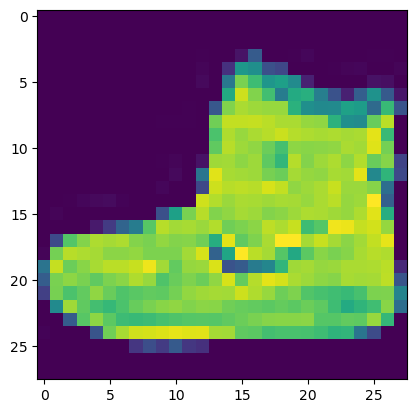

In [13]:
img_index=0
img=train_images[img_index]
print('image label :',train_labels[img_index])
plt.imshow(img)

image label : 3


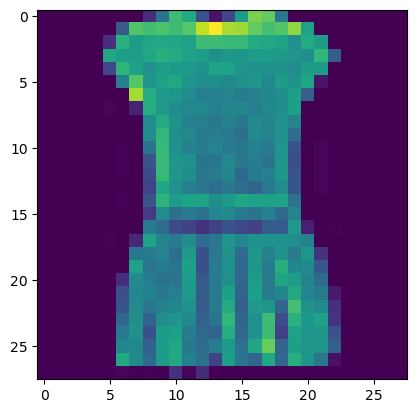

In [23]:
img_index=3
img=train_images[img_index]
print('image label :',train_labels[img_index])
plt.imshow(img)

# creating neural networks model

In [26]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Flatten

In [31]:
model=keras.Sequential([keras.layers.Flatten(input_shape=(28,28)),
keras.layers.Dense(128,activation='relu'),
keras.layers.Dense(10,activation='softmax')])

# compile the model

In [32]:
model.compile(optimizer='Adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [34]:
model.fit(train_images,train_labels,epochs=10,batch_size=32)

Epoch 1/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.6220 - accuracy: 0.7848
Epoch 2/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.5594 - accuracy: 0.8052
Epoch 3/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.5335 - accuracy: 0.8152
Epoch 4/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.5187 - accuracy: 0.8214
Epoch 5/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.4980 - accuracy: 0.8300
Epoch 6/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.4927 - accuracy: 0.8325
Epoch 7/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.4841 - accuracy: 0.8331
Epoch 8/10
1875/1875 [==============================] - 7s 3ms/step - loss: 0.4768 - accuracy: 0.8363
Epoch 9/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.4738 - accuracy: 0.8400
Epoch 10/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.469

# evaluating the model

In [35]:
model.evaluate(test_images,test_labels)

313/313 [==============================] - 1s 2ms/step - loss: 0.5220 - accuracy: 0.8307


[0.522031843662262, 0.8306999802589417]

# make aprediction

In [39]:
predictions=model.predict(test_images[:10])
print(np.argmax(predictions ,axis=1))

1/1 [==============================] - 0s 23ms/step
[9 2 1 1 6 1 4 6 5 7]


# true values

In [38]:
print(test_labels[:10])

[9 2 1 1 6 1 4 6 5 7]
